In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import itertools as it

In [6]:
def func1(phi,l,lamb,gamma):
    
    part1=(lamb-np.cos(phi))/np.sqrt((lamb-np.cos(phi))**2+(gamma*np.sin(phi))**2)
    
    return part1*np.cos(l*phi)/np.pi

def func2(phi,l,lamb,gamma):
    
    part2=(gamma*(np.sin(phi)))/np.sqrt((lamb-np.cos(phi))**2+(gamma*np.sin(phi))**2)
    
    return -part2*np.sin(l*phi)/np.pi

def gfunc(l,lamb,gamma=1):
    
    integ1=integrate.quad(func1,0,np.pi,args=(l,lamb,gamma))
    integ2=integrate.quad(func2,0,np.pi,args=(l,lamb,gamma))
    
    return integ1[0]-integ2[0]

def g_s(lambdas,gamma=1):

    g={}
    for n in range(-L,L): 
        for l in lambdas:
            g[n,l]=gfunc(n,l,gamma)
    return g

def assign_g(a,b,g,lamb):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return 1j*g[(d-1)//2,lamb]
        elif a%2==0:
            
            return -1j*g[-((d+1)//2),lamb]
    else:
        return 0
    
def assign_g_debug(a,b):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return "ig[{}]".format((d-1)//2)
        elif a%2==0:
            
            return "-ig[{}]".format(-(d+1)//2)
    else:
        return 0

def get_mat(gdic,lam):
    mat = [[None for c in range(1,2*L+1)] for r in range(1,2*L+1)]
    for x in range(1,2*L+1):
        for y in range(1,2*L+1):
            mat[x-1][y-1]=assign_g(x,y,gdic,lam)  
    return np.array(mat)

In [7]:
L=1
lambdarange=np.linspace(0.1,2,500)

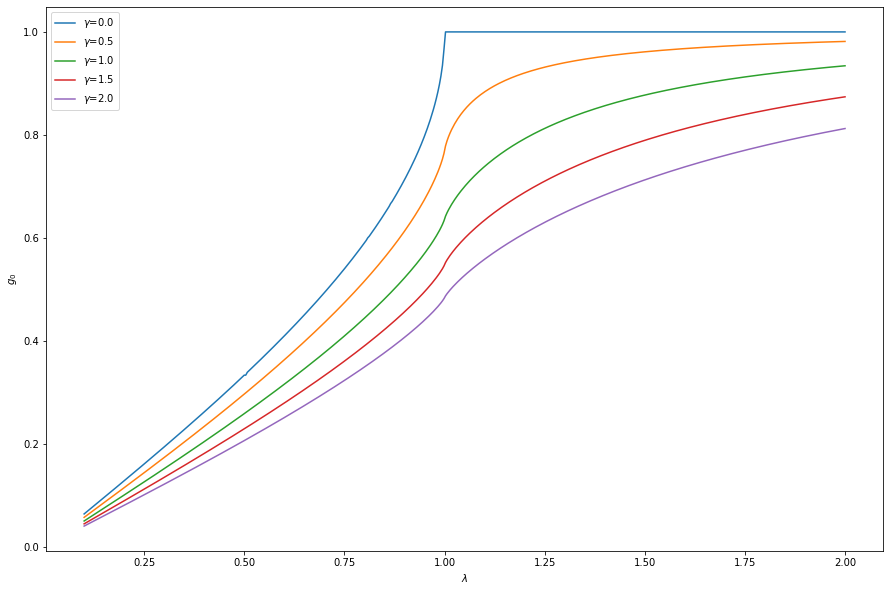

In [5]:
fig,ax=plt.subplots(figsize=(15,10))
for gam in np. linspace(0,2,5):
    for size in range(-L+1,L):
        temp_vec=np.zeros_like(lambdarange)
        for i,lam in enumerate(lambdarange):
            temp_vec[i]=gfunc(size,lam,gam)
        ax.plot(lambdarange,temp_vec,label=r"$\gamma$={:.1f}".format(gam))
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$g_0$")
plt.legend()
plt.show()

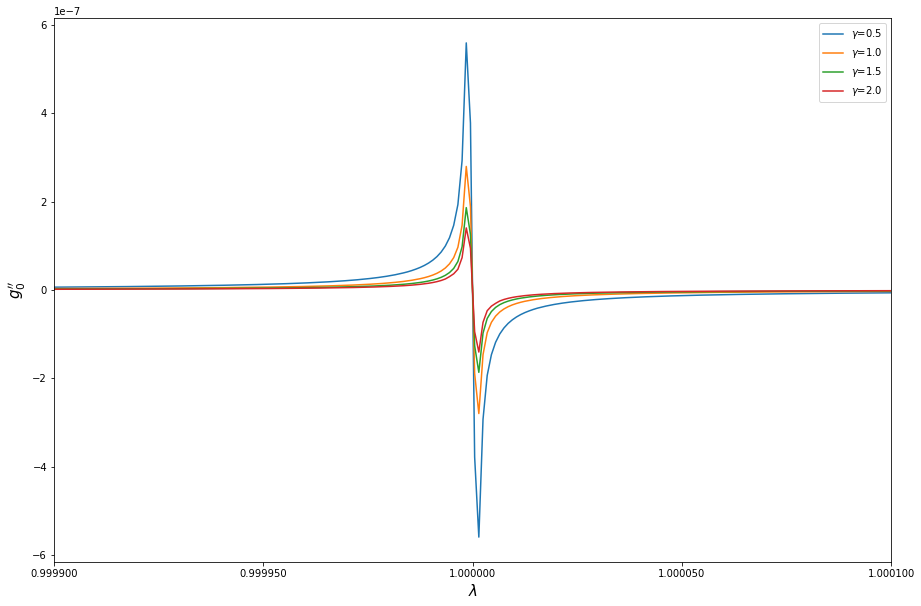

In [7]:
L=1
labels=["{:f}".format(x) for x in np.linspace(0.9999,1.0001,5)]
eps=0.001
lambdarange=np.linspace(1-eps,1+eps,2000)
fig,ax=plt.subplots(figsize=(15,10))
for j,gam in enumerate(np.linspace(0.5,2,4)):
    for size in range(-L+1,L):
        temp_vec=np.zeros_like(lambdarange)
        for i,lam in enumerate(lambdarange):
            temp_vec[i]=gfunc(size,lam,gam)
        ax.plot(lambdarange,np.gradient(np.gradient(temp_vec)),label=r"$\gamma$={:.1f}".format(gam))
plt.xlabel(r"$\lambda$",fontsize=15)
plt.ylabel(r"$g_0''$",fontsize=15)
plt.legend()
plt.xlim(0.9999,1.0001)
plt.xticks(np.linspace(0.9999,1.0001,5),labels)
#plt.savefig("secondder_maxerg_rho1_lowgamma")
plt.show()

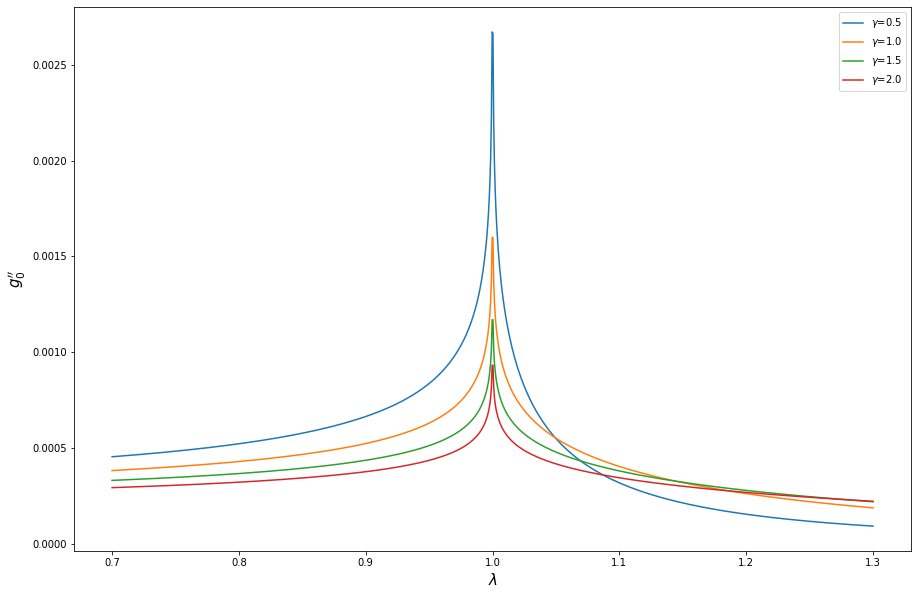

In [87]:
L=1
eps=0.3
lambdarange=np.linspace(1-eps,1+eps,1000)
fig,ax=plt.subplots(figsize=(15,10))
for j,gam in enumerate(np.linspace(0.5,2,4)):
        temp_vec=np.zeros_like(lambdarange)
        for i,lam in enumerate(lambdarange):
            temp_vec[i]=gfunc(0,lam,gam)
        ax.plot(lambdarange,np.gradient(temp_vec),label=r"$\gamma$={:.1f}".format(gam))
plt.xlabel(r"$\lambda$",fontsize=15)
plt.ylabel(r"$g_0''$",fontsize=15)
plt.legend()
#plt.savefig("secondder_maxerg_rho1_lowgamma")
plt.show()